In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [43]:
df1 = pd.read_csv("data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [44]:
df1.shape


(13320, 9)

In [45]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [46]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [47]:
df2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [48]:
#check count of null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [49]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [50]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [51]:
df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()                                   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4136\1027481039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


location       size total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK       1056   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00         4
2               Uttarahalli      3 BHK       1440   2.0   62.00         3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00         3
4                  Kothanur      2 BHK       1200   2.0   51.00         2

In [52]:
df3['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [53]:
df3[df3.bedrooms>20]

location        size total_sqft  bath  price  bedrooms
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0        27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0        43

In [54]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [55]:
#ranges is total_sqft, we should remove this error
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(isfloat)].head(10)

location       size      total_sqft  bath    price  bedrooms
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000         4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000         4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005         2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490         2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800         2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500         1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770         2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000         9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130         2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000         4

In [56]:
def convert_to_float(x):
    token = x.split('-')
    if len(token) == 2:
            print(token[0])
            print(token[1])
            return float(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
convert_to_float('2932-2850')

2932
2850


2891.0

In [57]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(lambda x: convert_to_float(x))
df4.head(3)

2100 
 2850
3067 
 8156
1042 
 1105
1145 
 1340
1015 
 1540
1195 
 1440
1120 
 1145
3090 
 5002
1160 
 1195
1115 
 1130
520 
 645
1000 
 1285
650 
 665
633 
 666
1445 
 1455
884 
 1116
850 
 1093
547.34 
 827.31
580 
 650
3425 
 3435
1804 
 2273
3630 
 3800
4000 
 5249
1250 
 1305
670 
 980
1005.03 
 1252.49
3630 
 3800
1004 
 1204
645 
 936
2710 
 3360
2830 
 2882
596 
 804
1255 
 1863
1300 
 1405
934 
 1437
980 
 1030
2249.81 
 4112.19
1070 
 1315
2806 
 3019
613 
 648
704 
 730
1210 
 1477
3369 
 3464
1125 
 1500
1076 
 1199
381 
 535
524 
 894
540 
 670
2725 
 3250
888 
 1290
660 
 700
385 
 440
770 
 841
524 
 894
1469 
 1766
1255 
 1350
870 
 1080
2580 
 2591
613 
 648
2563 
 2733
605 
 624
1349 
 3324
1255 
 1350
3300 
 3335
1180 
 1630
1365 
 1700
2830 
 2882
2830 
 2882
981 
 1249
1565 
 1595
1270 
 1275
840 
 1010
2830 
 2882
655 
 742
1408 
 1455
942 
 1117
598 
 958
1010 
 1300
1450 
 1950
763 
 805
3307 
 3464
620 
 934
2462 
 2467
540 
 740
3508 
 4201
4900 
 4940
755 
 7

location       size  total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3

In [58]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*10000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   

   price_per_sqft  
0      369.981061  
1      461.538462  
2      430.555556  
3      624.589086  
4      425.000000

In [59]:
#location is important becuase it is a type and usually for such types we have one-hot-encoding
# each column belongs to a certain class and each element belonging to certain class has a corresponding 1, others are 0
# but we have a lot of location meaning alot of columns
len(df5['location'].unique())
#1304 columns, to many features or dimentianality curse

1304

In [60]:
#solution, add other caetagory
df5['location'] = df5['location'].apply(lambda x: x.strip()) #remove useless spaces from start or end
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [61]:
less_than_ten = location_stats[location_stats<=10]
less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [62]:
df5['location'] = df5['location'].apply(lambda x: 'others' if x in less_than_ten else x)
len(df5.location.unique())

242

In [63]:
#remove outliers
# techniques : standard deviation, domain knowledge
# in domain knowledge, we set a threshold then examine it for instance a normal room has a threasold of 300 sqft
# so if any house has less than threasold value would be a outlier
df5[df5.total_sqft/df5.bedrooms< 300].head()
#now how a house can have 8 rooms and only size 600 sqft, that's an outlier

location       size  total_sqft  bath  price  bedrooms  \
9                others  6 Bedroom      1020.0   6.0  370.0         6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0         8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0         6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0         8   
70               others  3 Bedroom       500.0   3.0  100.0         3   

    price_per_sqft  
9      3627.450980  
45     3333.333333  
58     1066.098081  
68      629.629630  
70     2000.000000

In [64]:
df6 = df5[~(df5.total_sqft/df5.bedrooms< 300)]
df6.shape

(12502, 7)

In [65]:
df6.price_per_sqft.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [66]:
#removing price_per_sqft per location using standard deviation
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft <= (mean+std))]
        df_out = pd.concat([df_out,new_df],ignore_index = True)
    return df_out
df7 = remove_outliers(df6)
df7.shape

(10241, 7)

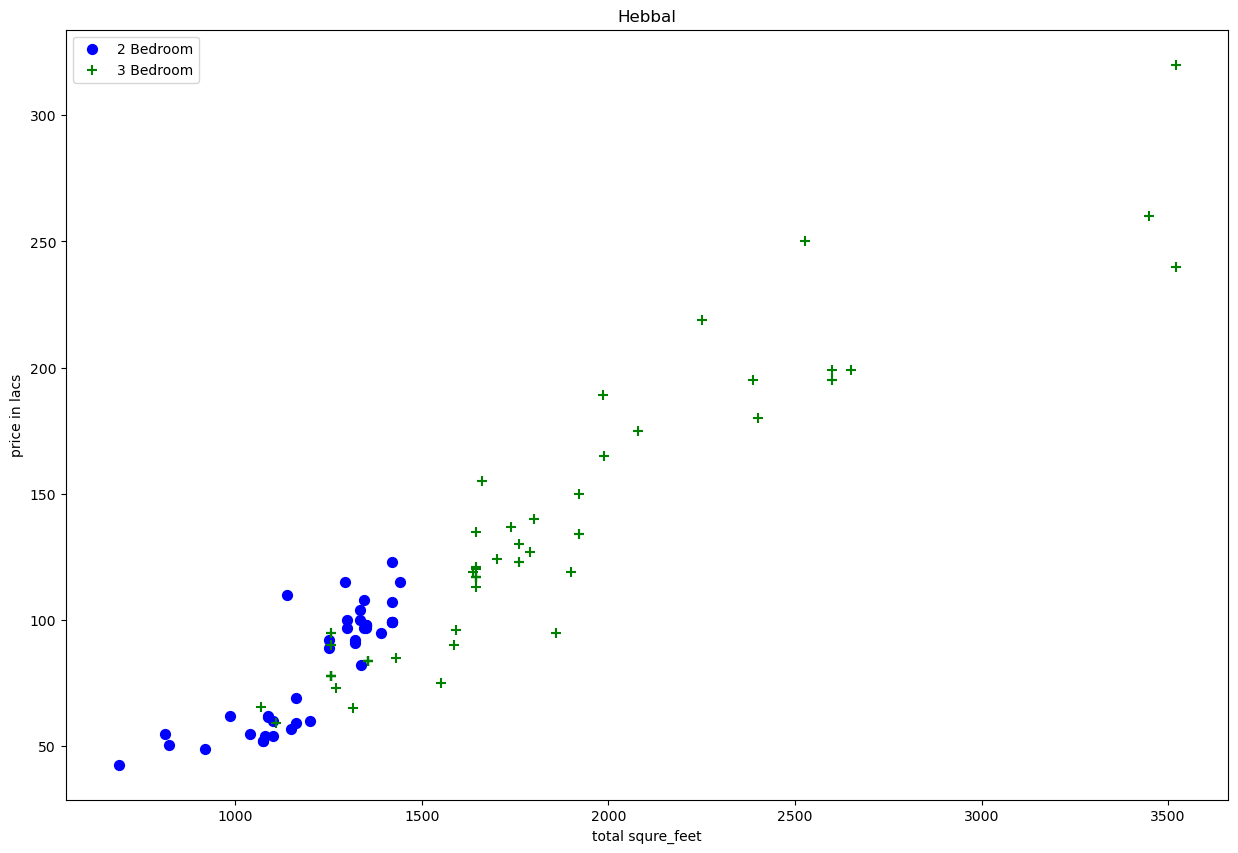

In [67]:
#same sqft_area but more price of house with less rooms in same location
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bedrooms == 2)]
    bhk3 = df[(df.location == location) & (df.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    pt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 Bedroom',s= 50)
    pt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color = 'green',label = '3 Bedroom',s= 50)
    pt.xlabel('total squre_feet')
    pt.ylabel('price in lacs')
    pt.title(location)
    pt.legend()
    
scatter_plot(df7,"Hebbal")

In [68]:
#remove outliers (house with bedrooms) that has price less than mean of price with less bedrooms
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape


(7329, 7)

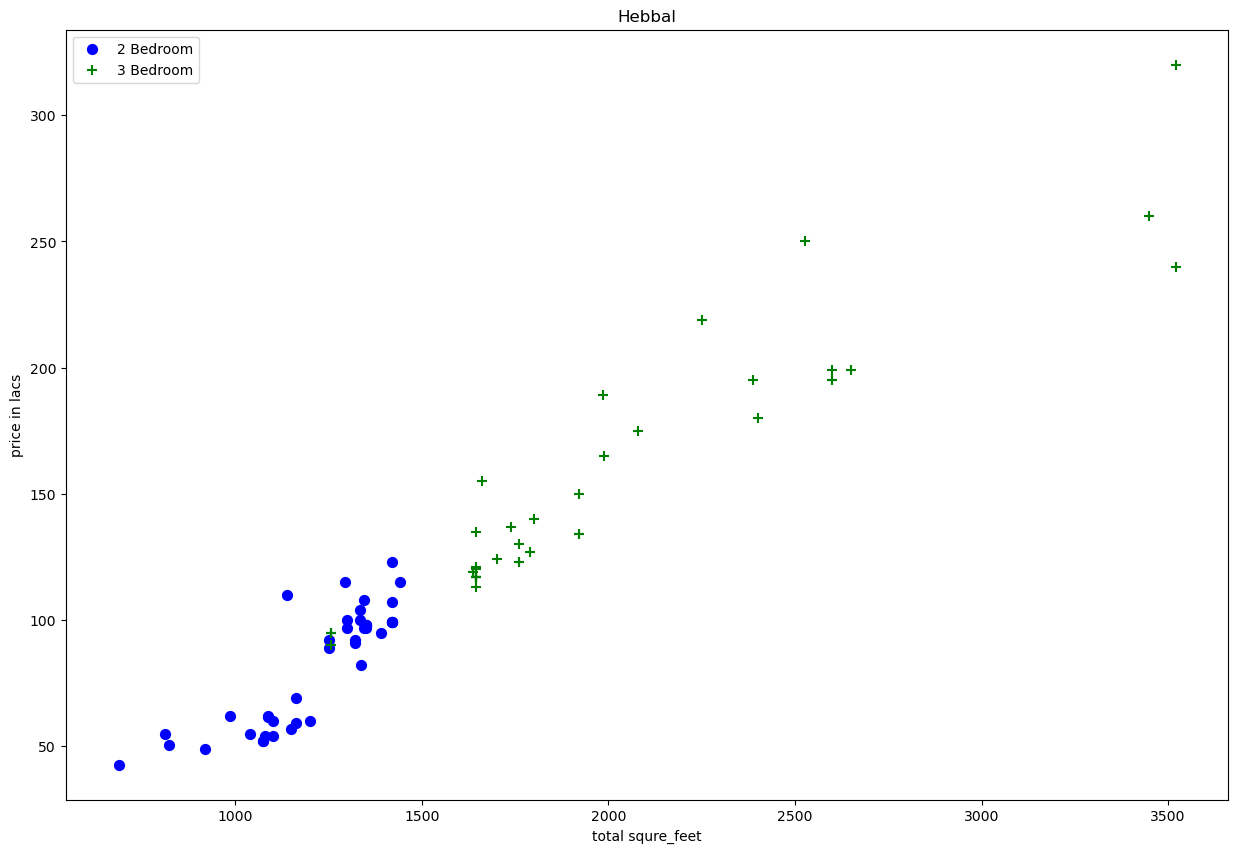

In [69]:
#now in this plot you will see majority of green plus which were below blue dots for same sqft are gone
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bedrooms == 2)]
    bhk3 = df[(df.location == location) & (df.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    pt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 Bedroom',s= 50)
    pt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color = 'green',label = '3 Bedroom',s= 50)
    pt.xlabel('total squre_feet')
    pt.ylabel('price in lacs')
    pt.title(location)
    pt.legend()
    
scatter_plot(df8,"Hebbal")

Text(0, 0.5, 'count')

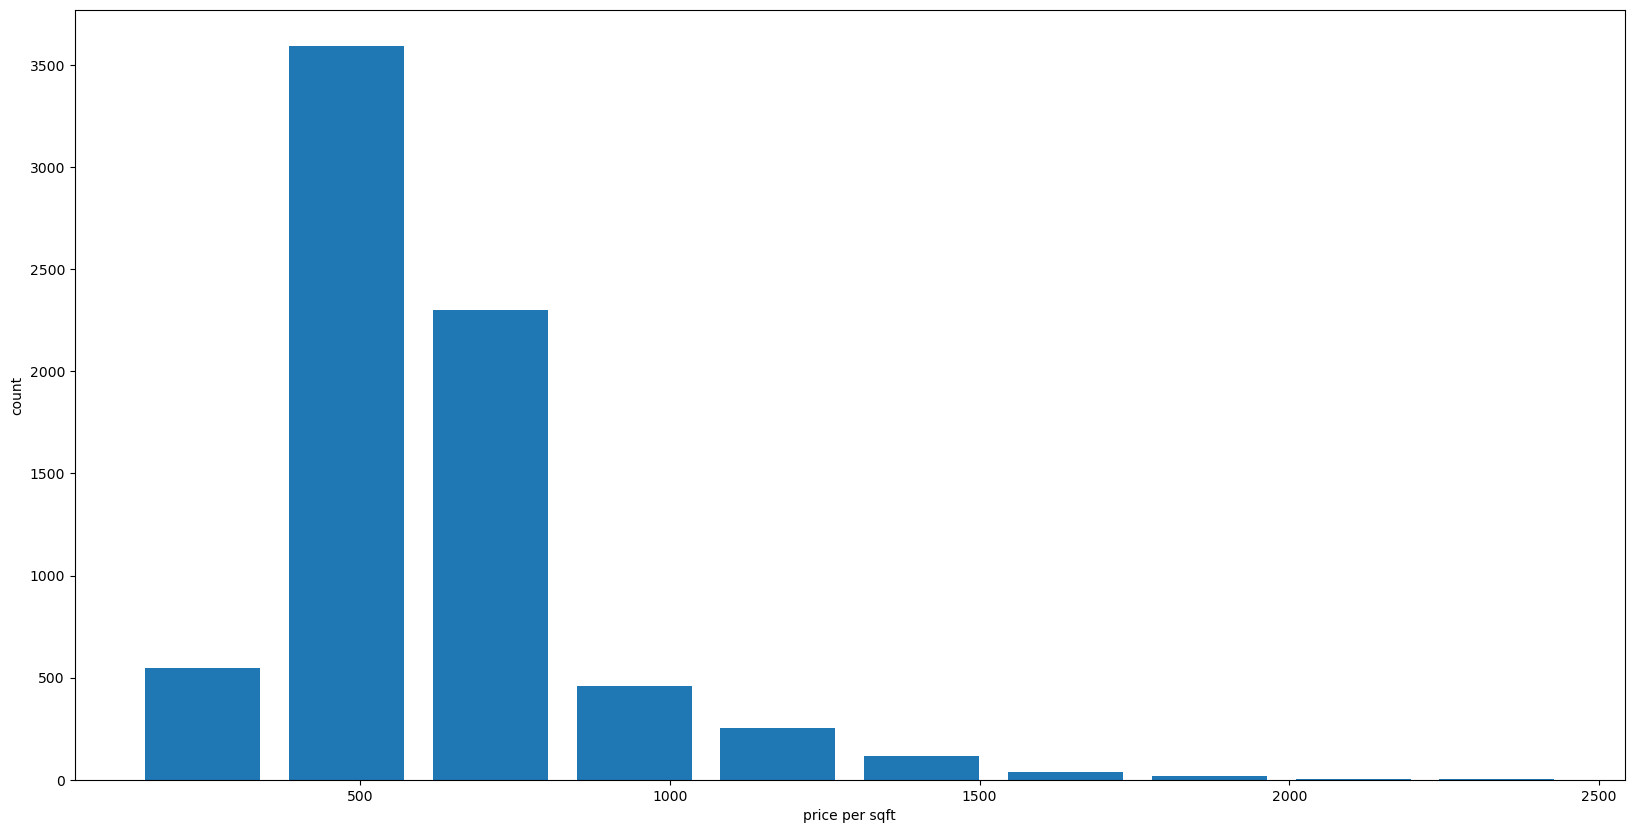

In [70]:
matplotlib.rcParams['figure.figsize'] = (20,10)
pt.hist(df8.price_per_sqft,rwidth= 0.8)
pt.xlabel('price per sqft')
pt.ylabel('count')

Text(0, 0.5, 'count')

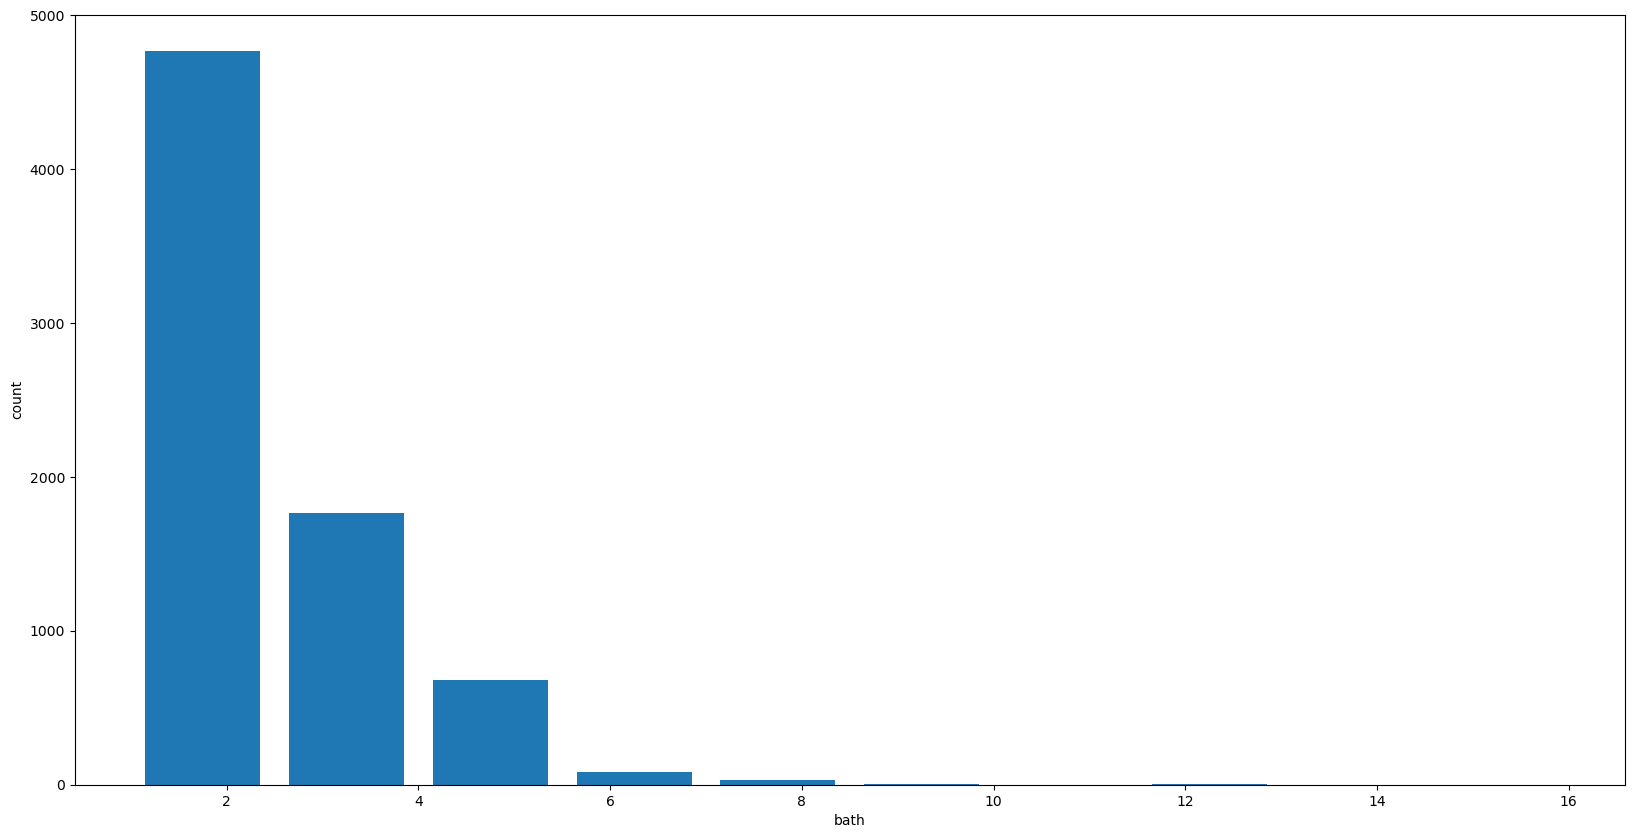

In [71]:
#removing bathroom outliers
matplotlib.rcParams['figure.figsize'] = (20,10)
pt.hist(df8.bath,rwidth= 0.8)
pt.xlabel('bath')
pt.ylabel('count')

In [72]:
#we set a threshold by domian knwoledge that any house which has more bathroom than number of bedrooms+2 , we remove them
df9 = df8[(df8.bath)< (df8.bedrooms+2)]

In [73]:
df9.shape


(7251, 7)

In [74]:
#now we remove unnecassary features for traning i.e remove size because we already have bathrooms and remove price_per_sqft
#because we only need it for outlier detection
df9.drop(['size','price_per_sqft'],axis = 'columns')

location  total_sqft  bath  price  bedrooms
0      1st Block Jayanagar      2850.0   4.0  428.0         4
1      1st Block Jayanagar      1630.0   3.0  194.0         3
2      1st Block Jayanagar      1875.0   2.0  235.0         3
3      1st Block Jayanagar      1200.0   2.0  130.0         3
4      1st Block Jayanagar      1235.0   2.0  148.0         2
...                    ...         ...   ...    ...       ...
10232               others      1200.0   2.0   70.0         2
10233               others      1800.0   1.0  200.0         1
10236               others      1353.0   2.0  110.0         2
10237               others       812.0   1.0   26.0         1
10240               others      3600.0   5.0  400.0         4

[7251 rows x 5 columns]

In [75]:
#machine learning model cannot interpret text data so we convert everything that is string into numbers
#create one-hot encoding
dummies = pd.get_dummies(df9.location)

dummies.head(10)


1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                  True               False                      False   
1                  True               False                      False   
2                  True               False                      False   
3                  True               False                      False   
4                  True               False                      False   
5                  True               False                      False   
6                  True               False                      False   
8                 False                True                      False   
9                 False                True                      False   
10                False                True                      False   

    2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                  False                 False               False   
1                  False                 False               False   
2                  False                 False               False   
3                  False                 False               False   
4                  False                 False               False   
5                  False                 False               False   
6                  False                 False               False   
8                  False                 False               False   
9                  False                 False               False   
10                 False                 False               False   

    6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                False               False               False   
1                False               False               False   
2                False               False               False   
3                False               False               False   
4                False               False               False   
5                False               False               False   
6                False               False               False   
8                False               False               False   
9                False               False               False   
10               False               False               False   

    9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                False  ...                 False               False   
1                False  ...                 False               False   
2                False  ...                 False               False   
3                False  ...                 False               False   
4                False  ...                 False               False   
5                False  ...                 False               False   
6                False  ...                 False               False   
8                False  ...                 False               False   
9                False  ...                 False               False   
10               False  ...                 False               False   

    Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0         False       False           False      False               False   
1         False       False           False      False               False   
2         False       False           False      False               False   
3         False       False           False      False               False   
4         False       False           False      False               False   
5         False       False           False      False               False   
6         False       False           False      False               False   
8         False       False           False      False               False   
9         False       False           False      False               False   
10        False       False           False      False               False   

    Yelenahalli  Yeshwanthpu

In [76]:
#we remove that column to avoid dummy variable trap
df10 = pd.concat([df9,dummies.drop('others',axis='columns')],axis='columns')
df10 = df10.drop(['location','size','price_per_sqft'],axis='columns')

In [77]:
#now we have dataframe with neccessary columns and labels
df10.head(10)

total_sqft  bath  price  bedrooms  1st Block Jayanagar  \
0       2850.0   4.0  428.0         4                 True   
1       1630.0   3.0  194.0         3                 True   
2       1875.0   2.0  235.0         3                 True   
3       1200.0   2.0  130.0         3                 True   
4       1235.0   2.0  148.0         2                 True   
5       2750.0   4.0  413.0         4                 True   
6       2450.0   4.0  368.0         4                 True   
8       1875.0   3.0  167.0         3                False   
9       1500.0   5.0   85.0         5                False   
10      2065.0   4.0  210.0         3                False   

    1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                False                      False                 False   
1                False                      False                 False   
2                False                      False                 False   
3                False                      False                 False   
4                False                      False                 False   
5                False                      False                 False   
6                False                      False                 False   
8                 True                      False                 False   
9                 True                      False                 False   
10                True                      False                 False   

    5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
0                  False               False  ...        False   
1                  False               False  ...        False   
2                  False               False  ...        False   
3                  False               False  ...        False   
4                  False               False  ...        False   
5                  False               False  ...        False   
6                  False               False  ...        False   
8                  False               False  ...        False   
9                  False               False  ...        False   
10                 False               False  ...        False   

    Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                  False               False        False       False   
1                  False               False        False       False   
2                  False               False        False       False   
3                  False               False        False       False   
4                  False               False        False       False   
5                  False               False        False       False   
6                  False               False        False       False   
8                  False               False        False       False   
9                  False               False        False       False   
10                 False               False        False       False   

    Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0            False      False               False        False         False  
1            False      False               False        False         False  
2            False      False               False        False         False  
3            False      False               False        False         False  
4            False      False               False        False         False  
5            False      False               False        False         False  
6            False      False               False        False         False  
8            False      False               False        False         False  
9            False      False               False        False         False  
10           False      False               False        False         False  

[10 rows x 245 columns]

In [78]:
#now we seperate dependant and independant variables
X= df10.drop('price',axis='columns')
X.head()



total_sqft  bath  bedrooms  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0         4                 True               False   
1      1630.0   3.0         3                 True               False   
2      1875.0   2.0         3                 True               False   
3      1200.0   2.0         3                 True               False   
4      1235.0   2.0         2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   
3               False               False  ...        False   
4               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 244 columns]

In [79]:
y = df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state =10)

In [81]:
#using linear_regression model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874279

In [82]:
#using k-fold cross validation model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [87]:
def predict_price(location,sqft,bath,bedrooms):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [95]:
price = predict_price('1st Phase JP Nagar',1000,2,2)

print(price,"lacs")

83.49904677167738 lacs


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [98]:
import pickle
import json
with open('prediction','wb') as f:
    pickle.dump(lr_clf,f)
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))